# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-wIzUAwxh-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 71143.84 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 100482.06 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 121391.61 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 133798.95 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 143032.44 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 146985.11 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 78528.79 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 108839.98 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 130166.90 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 139513.27 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 146489.61 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 147047.13 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.71 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.50 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.32 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.10 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.43 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.27 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.96 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.26 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.90 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.78 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.20 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.66 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.57 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.02 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.06 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.15 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.95 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.23 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.71 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 16.87 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.69 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.32 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.41 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.98 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.19 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 48.86 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.16 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.63 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.86 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.72 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.85 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 16.88 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.85 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 34.81 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.76 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.21 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 45.85 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.54 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.19 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.30 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.61 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.82 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.90 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.30 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.23 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.61 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.66 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.78 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.04 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.80 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.23 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.34 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.64 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.40 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.54 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.39 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.52 examples/s]

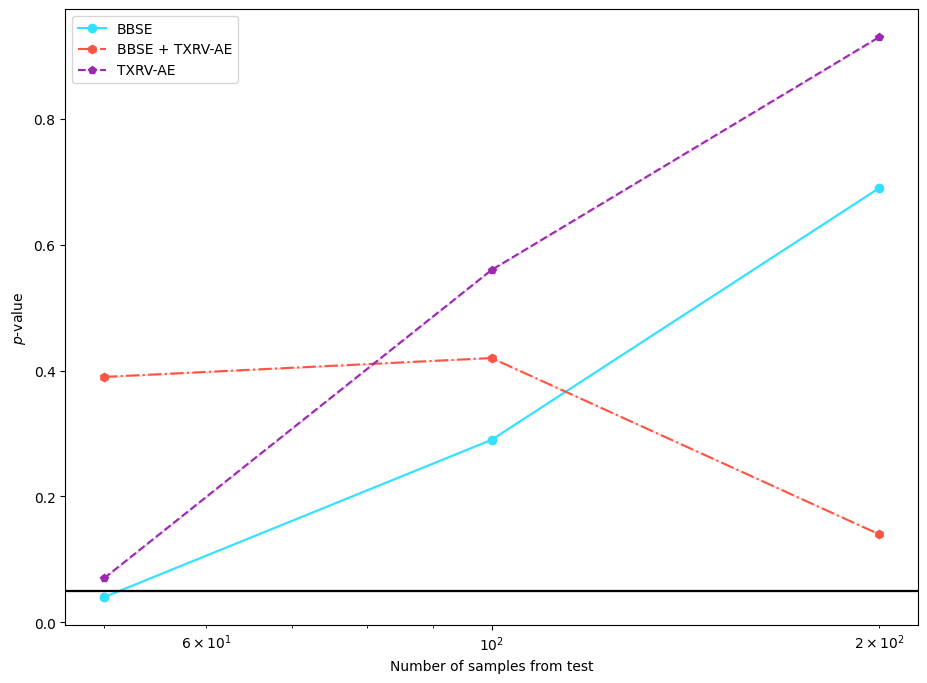

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.40 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.27 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.68 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.04 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.07 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.79 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.29 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.61 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.38 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.42 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.68 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.51 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.79 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.60 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.46 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.24 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.87 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.28 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.11 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.39 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.25 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 43.09 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.35 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.95 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.06 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.73 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.37 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.86 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.77 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.69 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.45 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.38 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.76 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.00 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.62 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.28 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.59 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.25 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.83 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.58 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.62 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.13 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.43 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.02 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.81 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.13 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.84 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.25 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.14 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.75 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.29 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.88 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.18 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.82 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.13 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.82 examples/s]

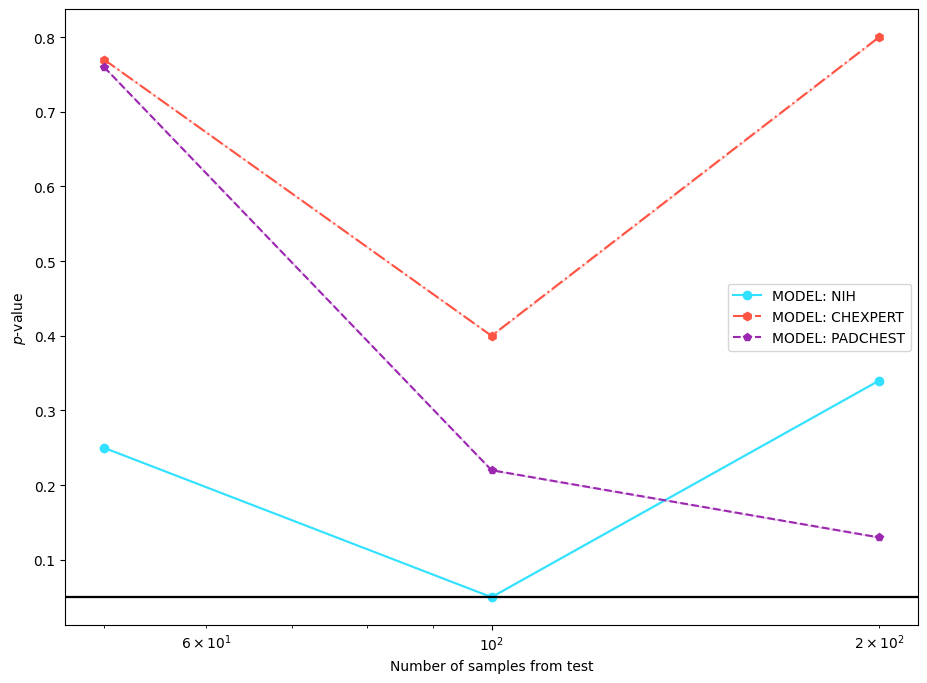

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 57562.01 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 84903.50 examples/s]

Filter (num_proc=6):  49%|████▉     | 55374/112120 [00:00<00:00, 80870.07 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 110685.14 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 112060.51 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54924.42 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 79406.81 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 93294.36 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 104085.97 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 108123.51 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111395.11 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.23 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.88 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.20 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.90 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.93 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.45 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.21 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.31 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.42 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.56 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.41 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.74 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.04 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.93 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.30 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.29 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.52 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.35 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.86 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52783.43 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73359.08 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 87725.29 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98000.02 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 104455.09 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109167.80 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 57698.28 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 80719.85 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 95068.43 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98535.30 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 104092.39 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 108881.77 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.53 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.29 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.91 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.79 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.93 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.56 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.37 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.87 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.91 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.57 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.68 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.76 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 16.89 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.72 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.45 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.88 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.62 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.36 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 57922.78 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 81531.99 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 94283.62 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 101750.84 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 105701.40 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111028.88 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49250.18 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73961.85 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84366.62 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 97707.15 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 99018.93 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109240.80 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.03 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.56 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.53 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.61 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.36 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.08 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.40 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.95 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.31 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.67 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.83 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.61 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.97 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.21 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.95 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.10 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.25 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.55 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.34 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 55446.31 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 80150.29 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91728.48 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98081.83 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 102966.89 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 108145.51 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52628.51 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 77614.96 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91531.41 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 99774.59 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 104715.84 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 108551.98 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.38 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.28 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 43.11 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.68 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 55.00 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.27 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.77 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.91 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.15 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.85 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.71 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.47 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.05 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.36 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.33 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.63 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.70 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.46 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.15 examples/s]

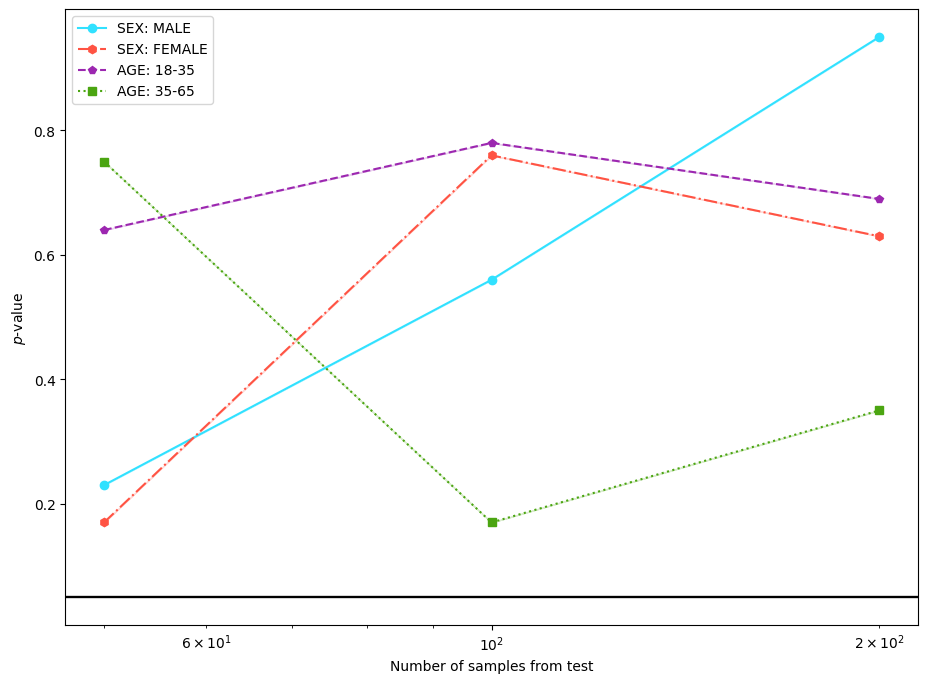

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.73 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.20 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.34 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.32 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.56 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.43 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.16 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.61 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.47 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.31 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.84 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.37 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.12 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.91 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.45 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.52 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.47 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.53 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.64 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.38 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.68 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.69 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.00 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.78 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.90 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.99 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.86 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.96 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.07 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.14 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.82 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.14 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.60 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.92 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.49 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.09 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.35 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.69 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.84 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.15 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.04 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.27 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.47 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.34 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.08 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.44 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.21 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.67 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.42 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.25 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.68 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.71 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.12 examples/s]

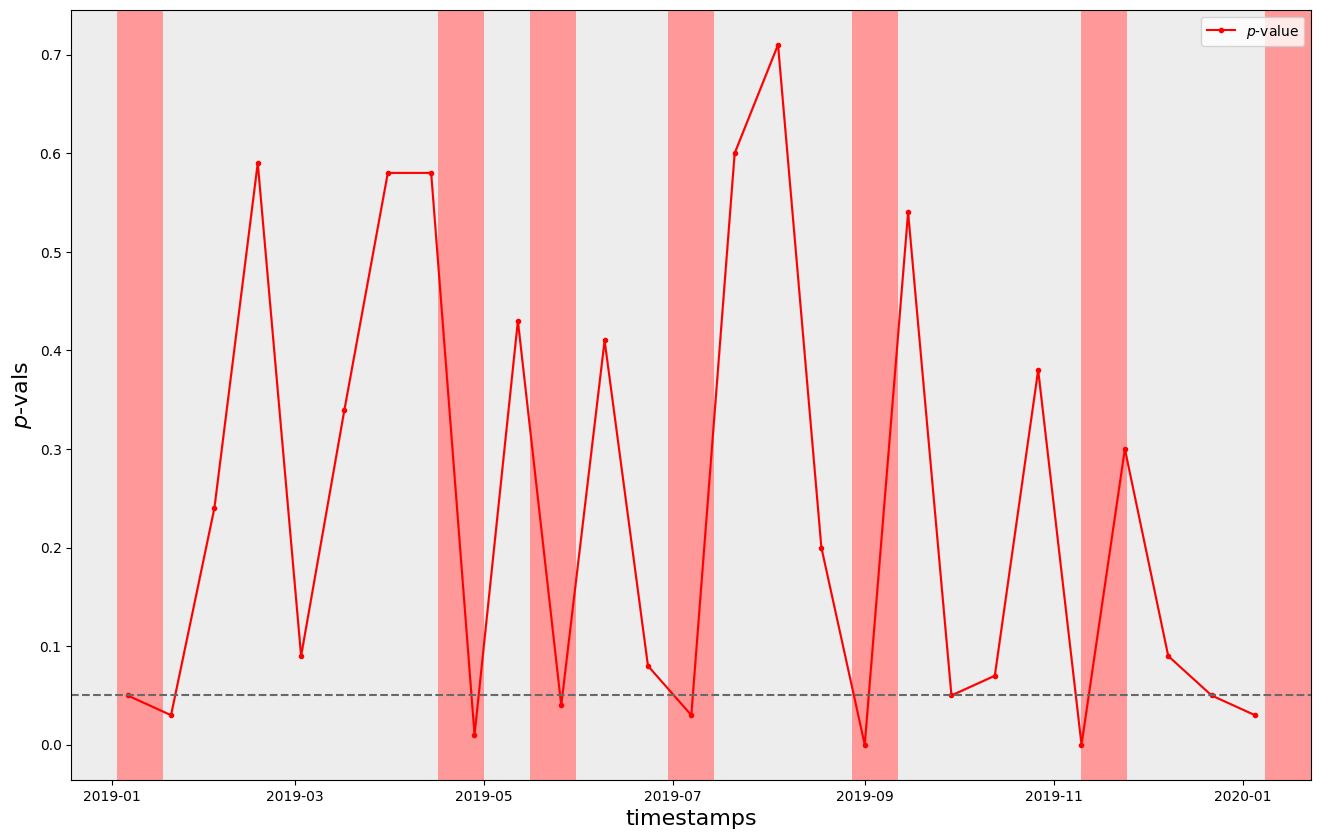

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)